## Analysis of Grade R ELOM Data in South Africa for 2019

### Goolam Bangie, Uwais Suliman, Iman Ahmed, Jonah Alter

This study collected data on South African children between the ages of 49-69 months from various socio-economic backgrounds, who have been exposed to Grade R education. These terms of their performance, social and emotional functioning, and orientation to specific tasks were directly assessed to arrive at the ELOM score of each learner.

ELOM is an age-normed, standardized instrument that is calculated based off of 23 indicators measuring a learner's early development in five domains:
- Gross Motor Development
- Fine Motor Coordination and Visual Motor Integration
- Emergent Numeracy and Mathematics
- Cognition and Executive Functioning
- Emergent Literacy and Language

These indicators each carry a certain weighting in their contribution to the total ELOM score. The ELOM score is then used to monitor trends over time in terms of the key development of each learner.


We set out to use this dataset in order to answer the questions presented below.

1. Does the socio-economic background of a child influence their ELOM score and, if so, to what extent? 
Create a linear regression model which will allow us to make inferences on the data.

This question was then broken down into the following sub-questions:

2. In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?
Create a model depicting the relationship between the fields `ChildObs1`- `ChildObs4` and the ELOM score of the child stored in the `total` field.

3. Is there a correlation between the ELOM score of a learner, the learner's age-group, as well as the quintile to which the learner's school belongs? 
Examine the relationship between the fields `Quintile`, `Age` and `total`(the child’s ELOM score). Based on the score of each of the five domains and the age-group to which a child belongs, we can categorize and determine whether a child is at risk, falling behind, or achieving the standard.


As shown above, the data contains fields needed to answer each of the sub-questions which we have posed. The data passes the five tests of data quality so therefore it should be more than sufficient enough in answering the questions.

##### Section of Contents:
* Data Description
* Data Wrangling
* Empirical Analysis
* Model Fitting
* Hypothesis Testing
* Interpretation of Results
* Conclusion

Together with the above mentioned contents we will make sure that we use the checklist mentioned in the project overview with regards to communication and presentation of our findings as well as the reproducibility of our report. These two actions will make it easier for someone else to understand our findings and methodology for future reference.

##### Data Description

_Data was retrieved from UCT DataFirst on the 24th of March 2021: https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/819/study-description_

The data relates to children between the ages of 49-69 months in selected schools around South Africa. The dataset looks at the ELOM score of various children in the different schools together with the tests that contribute to the total ELOM score. Additionally, it looks at their behavioral tendencies, home environment, social and economic factors and the mental state of the children who took part in the research. 

The data was collected from schools in the Western Cape, KwaZulu Natal, Eastern Cape and North West Provinces of South Africa on the 25 July 2020. This was done using the Early Learning Outcomes Measure (ELOM) tool which includes the following components: ELOM Direct Assessment Kit, ELOM Direct Assessment Kit list, ELOM Direct Assessment Manual, ELOM Technical Manual, ELOM Scoring Sheet, Open source online protocol for tablet/phone-based scoring and data capture, ELOM Teacher Assessment of the Child.

In order to measure the quality of the data we need to make sure it conforms with the 5 aspects of data quality namely Validity, Accuracy, Completeness, Consistency, Uniformity
* Validity: The data conforms to a standard format but contains a few nulls which could impact our outcomes for the specific questions that we mentioned above.
* Accuracy: The data was collected from actual Grade R learners and is therefore accurate and conforms to the real world.
* Completeness: There are null entries in the hfa (height for age z-score) column. There are no duplicate entries present.
* Consistency: Upon looking at the data, data in fields and columns respectively appear to be in logical agreement.
* Uniformity: By looking at the dataset, we are able to confirm that the same units are used across a given field. For example, all heights in the ‘Height’ column are given in cm and all ages in the ‘Age’ column are given in months.


In [1]:
# Initialisation Cell
import numpy as np
import pandas as pd
import seaborn as sns
import numpy.testing as npt
import pandas.testing as pdt
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True, precision=7)

##### Importing data

In [2]:
df = pd.read_stata('elom.dta')
dfClean = df.copy() # make a copy of the dataframe which will be manipulated
display(df)

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,...,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,...,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,...,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,...,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,...,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,...,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1474_1_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Female,61.278690,...,15.36,72.580002,Almost always,Almost always,Almost always,Almost always,12,4,20,11
2051,1474_0_6,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,61.147541,...,10.03,48.290001,Sometimes,Sometimes,Sometimes,Sometimes,4,4,15,7
2052,1474_0_8,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.327869,...,3.72,40.650002,Sometimes,Sometimes,Sometimes,Sometimes,4,3,18,4
2053,1474_0_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.262295,...,9.70,38.470001,Sometimes,Often,Sometimes,Often,6,4,19,11


As shown above, the size of the dataset is 2055 rows x 54 columns.

In order to validate our dataset we performed the following tasks:

Below we run three functions to verify whether or not the data in our pandas dataframe is valid in terms of being ready for data manipulation. The first function we ran was `data.info()`, which allowed us to thoroughly check each column's data type. Our investigation concluded that each variable correlates with the respective variable descriptions on the website.

We also concluded that every variable that needed to be numerical or any variable that was needed for calculations is of type integer or float, whereas any categorical data variables are of type category. Our second function was to determine if there were any duplicates in the dataset. The result was that there were no duplicate entries that would impact our research or our ability to answer our above mentioned questions. 

Lastly, we wrote a function to determine whether there were any `null` values in either the rows or columns. The `hfa` column which represents the z-score of heights for age returned `null` values. This will be fixed in the data wrangling process in order to make sure that our data is valid and ready to be used for answering our questions.

The tidiness of the data is represented by whether each row is its own observation, each column represents a variable of the data and every cell has a value - categorical or numerical. As seen below, each of the above criteria are met, therefore indicating that the data is tidy. In order to further prove the tidiness of the data we will evaluate our dataset with the characteristics of messy data which are:

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- A single observational unit is stored in multiple tables.

It is clear from below that every column header is a variable name and not a value.
We can also see that each variable corresponds to a single column.
Variables are stored in columns whereas observations are in rows.
Every observational unit is stored in a single table.

Using the evidence below we can conclude that the data is indeed tidy and ready to use for modelling and answering our questions.

In [3]:
display(dfClean.columns)
display(dfClean)

Index(['csid', 'Province', 'SchoolID', 'RuralOrUrbanDistance',
       'RuralOrUrbanCensus', 'Quintile', 'CompositeQuintileGroup', 'District',
       'Gender', 'Age', 'AgeGroup', 'HomeLanguage', 'AssesLanguage', 'Height',
       'hfa', 'ChildSupportGrant', 'ProgrammeYear', 'Item1', 'Item2', 'Item3',
       'Item4', 'gmd', 'Item5', 'Item6', 'Item7', 'Item8', 'fmcvmi', 'Item9',
       'Item10', 'Item11', 'Item12', 'Item13', 'enm', 'Item14', 'Item15',
       'Item16', 'Item17', 'cef', 'Item18', 'Item19', 'Item20', 'Item21',
       'Item22', 'Item23', 'ell', 'total', 'ChildObs1', 'ChildObs2',
       'ChildObs3', 'ChildObs4', 'ChildObs', 'SelfCare', 'SocialRelations',
       'EmotionalReadiness'],
      dtype='object')

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,...,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,...,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,...,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,...,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,...,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,...,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1474_1_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Female,61.278690,...,15.36,72.580002,Almost always,Almost always,Almost always,Almost always,12,4,20,11
2051,1474_0_6,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,61.147541,...,10.03,48.290001,Sometimes,Sometimes,Sometimes,Sometimes,4,4,15,7
2052,1474_0_8,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.327869,...,3.72,40.650002,Sometimes,Sometimes,Sometimes,Sometimes,4,3,18,4
2053,1474_0_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.262295,...,9.70,38.470001,Sometimes,Often,Sometimes,Often,6,4,19,11


In [4]:
print(dfClean.info(),
     '\n___________duplicated()___________\n', dfClean.duplicated().any(),
     '\n_____________isnull()_____________\n', dfClean.isnull().sum()
     )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   csid                    2055 non-null   object  
 1   Province                2055 non-null   category
 2   SchoolID                2055 non-null   int16   
 3   RuralOrUrbanDistance    2055 non-null   category
 4   RuralOrUrbanCensus      2055 non-null   category
 5   Quintile                2055 non-null   int8    
 6   CompositeQuintileGroup  2055 non-null   category
 7   District                2055 non-null   category
 8   Gender                  2055 non-null   category
 9   Age                     2055 non-null   float64 
 10  AgeGroup                2055 non-null   category
 11  HomeLanguage            2055 non-null   category
 12  AssesLanguage           2055 non-null   category
 13  Height                  2055 non-null   float64 
 14  hfa                     

We determined that the `hfa` column would not be necessary to answer any of the questions we posed. As such, and due to the fact that it contained `null` values, we decided to drop it.

In [5]:
dfClean = dfClean.drop(['hfa'],axis=1)

For the next part of the data cleaning process, we examined each categorical variable in our DataFrame and ensured that order was present in only the variables where applicable.

In [6]:
# Removing order between catgreories which was not applicable
dfClean.Province = pd.Categorical(dfClean.Province,ordered = False)
dfClean.RuralOrUrbanDistance = pd.Categorical(dfClean.RuralOrUrbanDistance,ordered = False)
dfClean.RuralOrUrbanCensus = pd.Categorical(dfClean.RuralOrUrbanCensus,ordered = False)
dfClean.District = pd.Categorical(dfClean.District,ordered = False)
dfClean.Gender = pd.Categorical(dfClean.Gender,ordered = False)
dfClean.HomeLanguage = pd.Categorical(dfClean.HomeLanguage,ordered = False)
dfClean.AssesLanguage = pd.Categorical(dfClean.AssesLanguage,ordered = False)
dfClean.ChildSupportGrant = pd.Categorical(dfClean.ChildSupportGrant,ordered = False)

# Renamed category
dfClean['District'] = dfClean['District'].replace('CAPE WINELANDS', 'cape winelands')

# Displaying the categories
display(dfClean.Province.unique())
display(dfClean.RuralOrUrbanDistance.unique())
display(dfClean.RuralOrUrbanCensus.unique())
display(dfClean.CompositeQuintileGroup.unique())
display(dfClean.District.unique())
display(dfClean.Gender.unique())
display(dfClean.AgeGroup.unique())
display(dfClean.HomeLanguage.unique())
display(dfClean.AssesLanguage.unique())
display(dfClean.ChildSupportGrant.unique())
display(dfClean.ProgrammeYear.unique())
display(dfClean.ChildObs1.unique())
display(dfClean.ChildObs2.unique())
display(dfClean.ChildObs3.unique())
display(dfClean.ChildObs4.unique())

['ec', 'kzn', 'nw', 'wc']
Categories (4, object): ['ec', 'kzn', 'nw', 'wc']

['Urban', 'Rural']
Categories (2, object): ['Urban', 'Rural']

['Rural', 'Urban']
Categories (2, object): ['Rural', 'Urban']

['Quintile 2 & 3', 'Quintile 4 & 5', 'Quintile 1']
Categories (3, object): ['Quintile 1' < 'Quintile 2 & 3' < 'Quintile 4 & 5']

['mthata', 'libode', 'ilembe', 'umgungundlovu', 'rustenburg', 'madibeng', 'overberg', 'cape winelands']
Categories (8, object): ['mthata', 'libode', 'ilembe', 'umgungundlovu', 'rustenburg', 'madibeng', 'overberg', 'cape winelands']

['Male', 'Female']
Categories (2, object): ['Male', 'Female']

['50 to 59', '60 to 69', '70 to 72']
Categories (3, object): ['50 to 59' < '60 to 69' < '70 to 72']

['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']
Categories (5, object): ['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']

['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']
Categories (5, object): ['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']

['Yes', 'No', 'Do Not Know']
Categories (3, object): ['Yes', 'No', 'Do Not Know']

['1 Year in Programme', '2 Years in Programme', 'Do Not Know']
Categories (3, object): ['Do Not Know' < '1 Year in Programme' < '2 Years in Programme']

['Sometimes', 'Almost never', 'Often', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Sometimes', 'Almost never', 'Often', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Sometimes', 'Often', 'Almost never', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Almost never', 'Sometimes', 'Almost always', 'Often']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

As seen below, the DataFrame is now clear of duplicates and `null` values and is able to be used to generate our models. The below code just makes sure that our data conforms to the attributes of good data quality and in turn also serves as a sense check between our now clean data and our raw data above.

In [7]:
print(dfClean.info(),
     '\n\n___________duplicated()___________\n', dfClean.duplicated().any(),
     '\n\n_____________isnull()_____________\n', dfClean.isnull().sum()
     )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   csid                    2055 non-null   object  
 1   Province                2055 non-null   category
 2   SchoolID                2055 non-null   int16   
 3   RuralOrUrbanDistance    2055 non-null   category
 4   RuralOrUrbanCensus      2055 non-null   category
 5   Quintile                2055 non-null   int8    
 6   CompositeQuintileGroup  2055 non-null   category
 7   District                2055 non-null   category
 8   Gender                  2055 non-null   category
 9   Age                     2055 non-null   float64 
 10  AgeGroup                2055 non-null   category
 11  HomeLanguage            2055 non-null   category
 12  AssesLanguage           2055 non-null   category
 13  Height                  2055 non-null   float64 
 14  ChildSupportGrant       

In order to answer our main question, we create a DataFrame consisting of the variables which relate to the socio-economic factors of the learners. Certain variables are one-hot encoded to allow them to be interpreted in a model.

In [8]:
df_mainQ = dfClean[['Quintile', 'Age', 'total']]
district = pd.get_dummies(dfClean.District, prefix='District') # apply one-hot encoding to the 'District' variable
grant = pd.get_dummies(dfClean.ChildSupportGrant, prefix='ChildSupportGrant') # apply one-hot encoding to the 'ChildSupportGrant' variable
df_mainQ = pd.concat([df_mainQ,district],axis=1)
df_mainQ = pd.concat([df_mainQ,grant],axis=1)
display(df_mainQ)

,Quintile,Age,total,District_mthata,District_libode,District_umgungundlovu,District_ilembe,District_madibeng,District_rustenburg,District_overberg,District_cape winelands,ChildSupportGrant_Yes,ChildSupportGrant_No,ChildSupportGrant_Do Not Know
0,3,59.311474,34.860001,1,0,0,0,0,0,0,0,1,0,0
1,3,58.950821,43.740002,1,0,0,0,0,0,0,0,1,0,0
2,3,58.688526,28.400000,1,0,0,0,0,0,0,0,1,0,0
3,3,58.491802,34.049999,1,0,0,0,0,0,0,0,1,0,0
4,3,57.934425,8.600000,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1,61.278690,72.580002,0,0,0,1,0,0,0,0,1,0,0
2051,1,61.147541,48.290001,0,0,0,1,0,0,0,0,1,0,0
2052,1,60.327869,40.650002,0,0,0,1,0,0,0,0,1,0,0
2053,1,60.262295,38.470001,0,0,0,1,0,0,0,0,1,0,0


In [9]:
df_behaviour = dfClean[['ChildObs', 'SelfCare', 'SocialRelations', 'EmotionalReadiness', 'total']]
display(df_behaviour.corr())
df_behaviour_stats = pd.DataFrame({'Mean': df_behaviour.mean(), 'Std': df_behaviour.std()})
display(df_behaviour_stats)

,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total
ChildObs,1.000000,0.144763,0.282119,0.383548,0.581320
SelfCare,0.144763,1.000000,0.212451,0.224424,0.189644
SocialRelations,0.282119,0.212451,1.000000,0.598983,0.271454
EmotionalReadiness,0.383548,0.224424,0.598983,1.000000,0.459545
total,0.581320,0.189644,0.271454,0.459545,1.000000


,Mean,Std
ChildObs,7.172263,3.177714
SelfCare,3.714842,0.598968
SocialRelations,17.745012,3.755450
EmotionalReadiness,8.243796,2.969404
total,57.824092,14.530255


Below is a visualisation of the relationship between the Child Observation fields and the ELOM score.

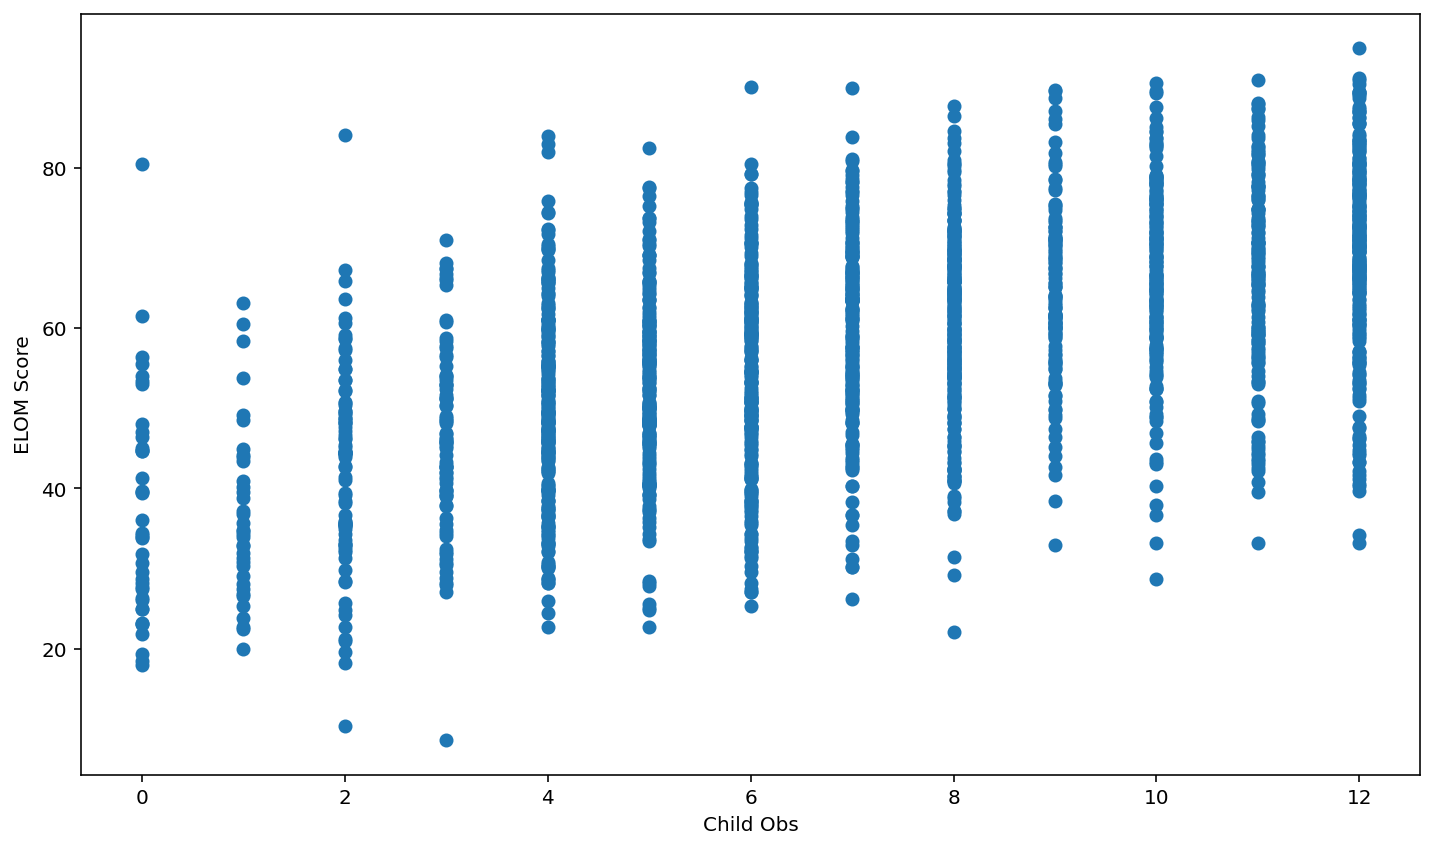

In [10]:
plt.scatter(dfClean.ChildObs,dfClean.total)
plt.xlabel('Child Obs')
plt.ylabel('ELOM Score')
plt.show()

Correlation matrix regarding Quintile, Age and ELOM Score(Total) representing the correlation coefficients between the aforementioned variables.

In [11]:
df_corr = dfClean[['Quintile', 'Age', 'total']]
df_corr.corr()

,Quintile,Age,total
Quintile,1.000000,0.132925,0.228214
Age,0.132925,1.000000,0.339841
total,0.228214,0.339841,1.000000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


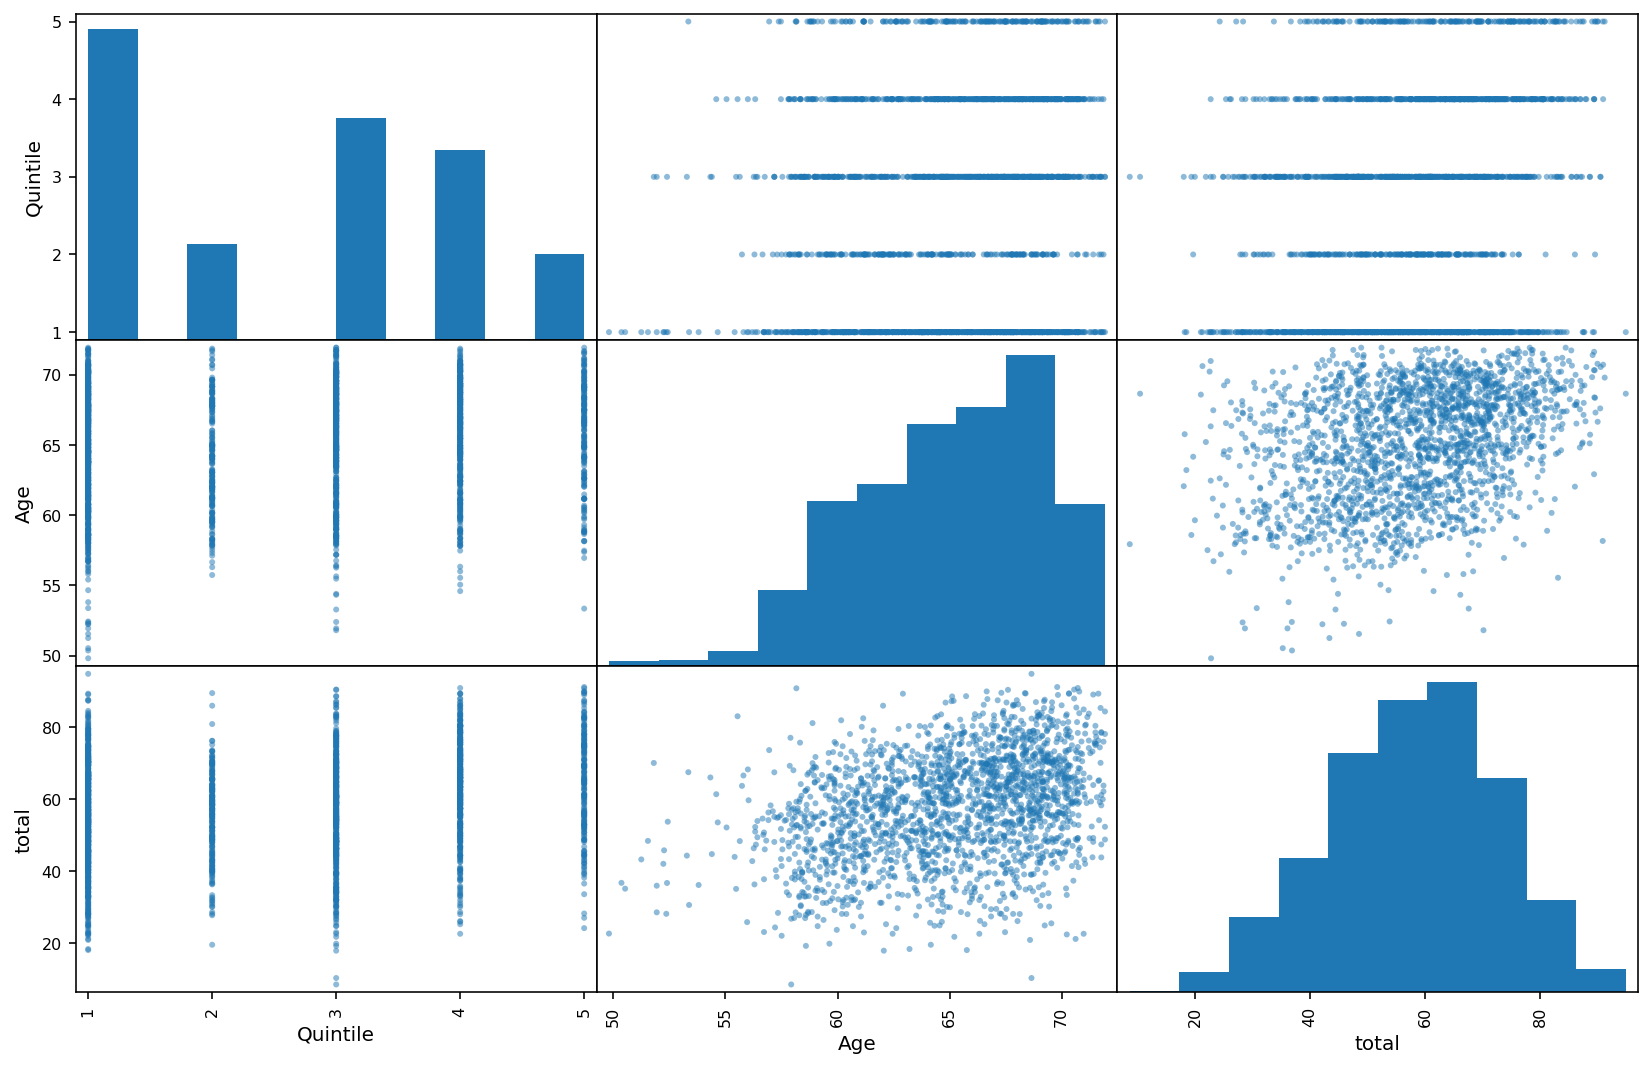

In [12]:
pd.plotting.scatter_matrix(df_corr, figsize=(14,9))
plt.show()

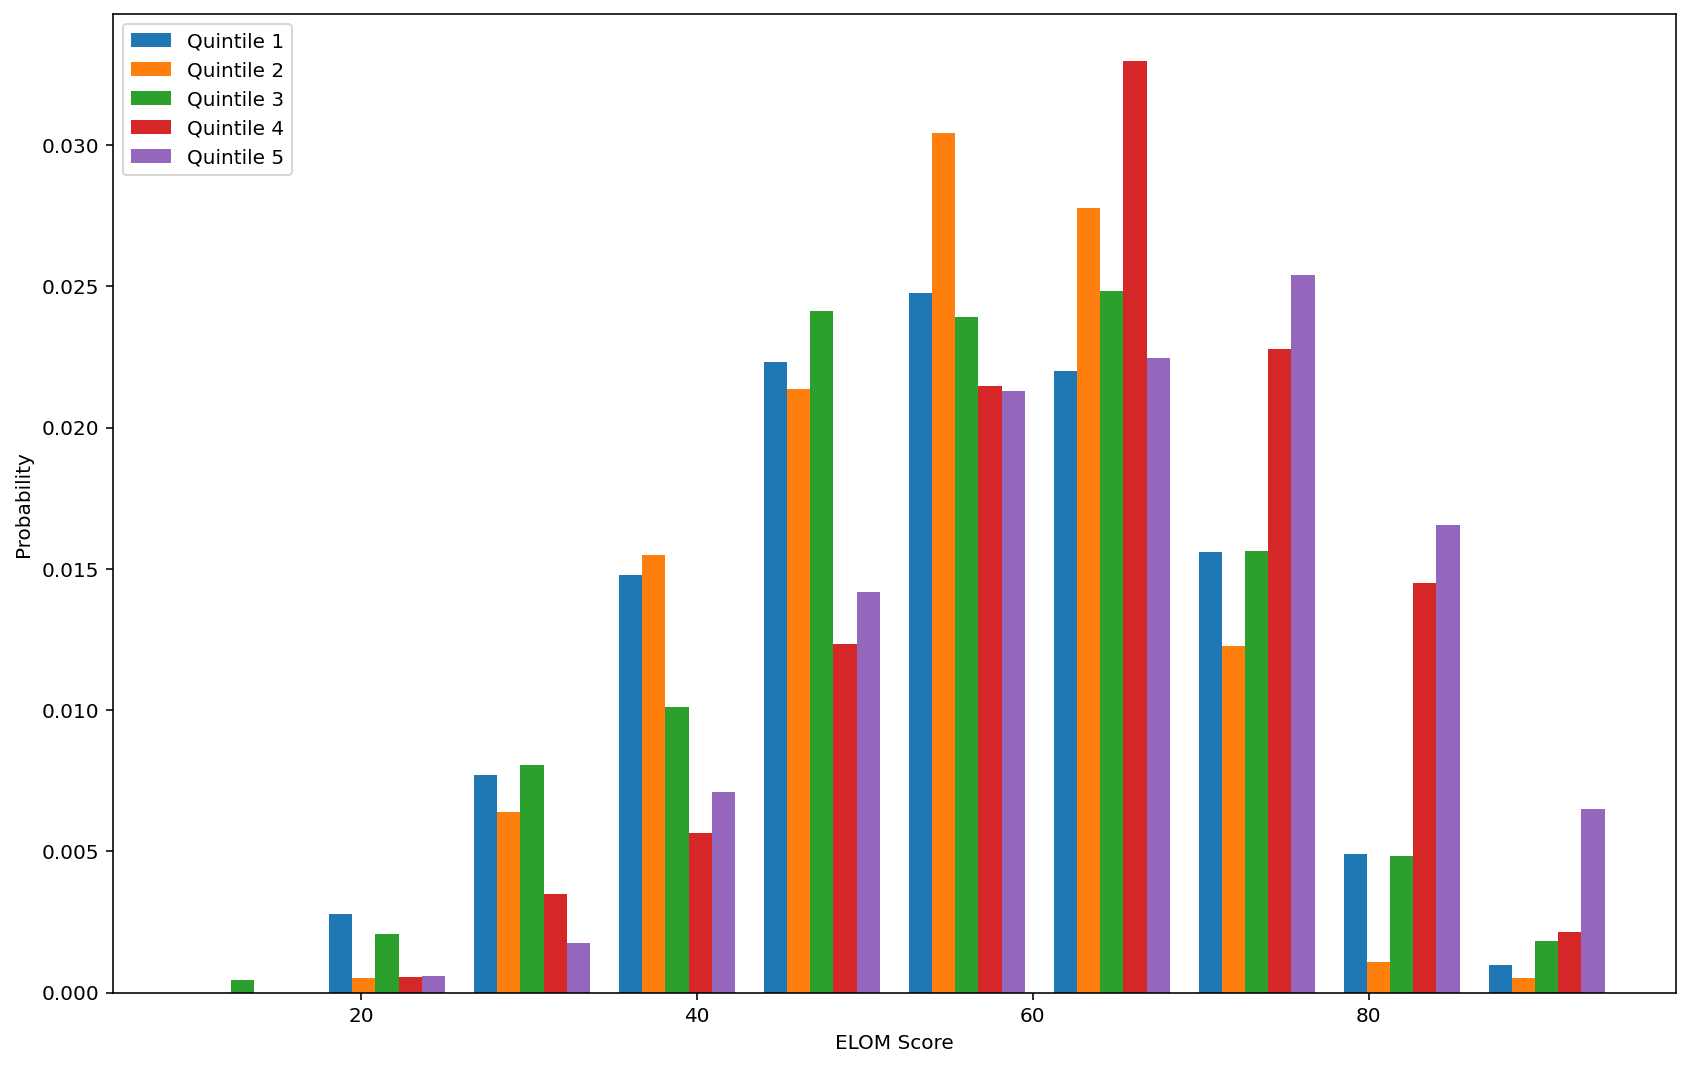

In [13]:
plt.figure(figsize=(14,9))
plt.hist([df_corr.total[df_corr.Quintile==1], df_corr.total[df_corr.Quintile==2], df_corr.total[df_corr.Quintile==3], df_corr.total[df_corr.Quintile==4], df_corr.total[df_corr.Quintile==5]], label=['Quintile 1', 'Quintile 2', 'Quintile 3', 'Quintile 4', 'Quintile 5'],density=True)
plt.legend(loc='upper left')
plt.xlabel('ELOM Score')
plt.ylabel('Probability')
plt.show()

In [14]:
dfAgeGroup1 = dfClean[dfClean.AgeGroup == '50 to 59']
dfAgeGroup2 = dfClean[dfClean.AgeGroup == '60 to 69']
dfAgeGroup3 = dfClean[dfClean.AgeGroup == '70 to 72']
display(dfAgeGroup1.groupby('Quintile').agg({'total':['mean']}))
display(dfAgeGroup2.groupby('Quintile').agg({'total':['mean']}))
display(dfAgeGroup3.groupby('Quintile').agg({'total':['mean']}))



,total
,mean
Quintile,
1,45.778899
2,49.693421
3,46.400685
4,57.192500
5,59.052105


,total
,mean
Quintile,
1,55.716433
2,55.528333
3,55.953423
4,63.187698
5,62.900303


,total
,mean
Quintile,
1,60.937679
2,60.310870
3,62.789789
4,65.606040
5,70.538000
